### **Explore and build label for Food dataset**

##### Import library

In [1]:
import numpy as np
import pickle
import json, string, sys
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import pickle
import re

##### Build necessary functions

In [2]:
def buildVoc(objData):
    spunctuation = set(string.punctuation) # String punctuation
    swords = set(stopwords.words('english')) # Get stop words in english: word has no meaning when it's alone
    print('Building vocabulary of words...')
    lem = WordNetLemmatizer() 

    # Count appearance of words in dataset, and save with type Key-Value: [(word, count), (word, count)]
    # Filter outlier
    # objData['categories'][0]['name_readable'] = objData['categories'][0]['name_readable'].replace(", ", "_")
    # objData['categories'][0]['name_readable'] = objData['categories'][0]['name_readable'].replace(" ", "_")

    objData['categories'][0]['name_readable'] = re.sub(r'[,\s]+', '_', objData['categories'][0]['name_readable'])
    
    word_counts = dict()
    for (i, entry) in enumerate(objData['categories']):
        # if i % 2 == 0:
        # caption = entry['name_readable'].replace(",", "")
        for word in word_tokenize(entry['name_readable'].lower()): # Get token of word
            word = lem.lemmatize(word) # -> Take the word to bare word
            if word not in swords and word not in spunctuation:
                word_counts[word] = 1 + word_counts.get(word, 0)


    # Sort desc according to count of words by using Value is parameter to sort.
    sword_counts = sorted(word_counts.items(), key = lambda x: -x[1])
    print(len(word_counts))

    id2word = {idx: word for (idx, (word, count)) in enumerate(sword_counts)}
    id2count = {idx: count for (idx, (word, count)) in enumerate(sword_counts)}
    word2id = {word: idx for (idx, word) in id2word.items()}
    vocabulary = (id2word, word2id, id2count)

    return vocabulary


def buidlLabel(objData, vocabulary):
    imageIds = [entry['id'] for entry in objData['images']]
    imageId2index = {image_id: idx for (idx, image_id) in enumerate(imageIds)}

    lem = WordNetLemmatizer()
    labels = np.zeros((len(objData['images']), len(vocabulary[0])))
    image_names = []
    for entry in objData['images']:
        caption = 'null'
        for val in objData['annotations']:
            if val['image_id'] == entry['id']:
                key = val['category_id']
                for check in objData['categories']:
                    if check['id'] == key:
                        caption = check['name_readable']
                        break
                image_id = entry['id']
                for word in word_tokenize(caption.lower()):
                    word = lem.lemmatize(word)
                    if word in vocabulary[1].keys():
                        labels[imageId2index[image_id], vocabulary[1][word]] = 1

        image_names.append(entry['file_name'])

    image_names = np.array(image_names)

    return labels, image_names

##### Build vocabulary of word in label

In [3]:
pathTrain = 'data/food/train/'
pathVal = 'data/food/val/'
annotation_dir_train = pathTrain + "annotations.json"
objData_train = json.load(open(annotation_dir_train))
vocabulary_train = buildVoc(objData_train)

annotation_dir_val = pathVal + "annotations.json"
objData_val = json.load(open(annotation_dir_val))
vocabulary_val = buildVoc(objData_val)

Building vocabulary of words...
323
Building vocabulary of words...
323


In [4]:
objData_val.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [5]:
label_of_food = np.array(list(vocabulary_train[0].values()))

In [6]:
len(label_of_food)

323

In [7]:
print(vocabulary_train[1])

{'beetroot_steamed_without_addition_of_salt': 0, 'bread_wholemeal': 1, 'jam': 2, 'water': 3, 'bread': 4, 'banana': 5, 'soft_cheese': 6, 'ham_raw': 7, 'hard_cheese': 8, 'cottage_cheese': 9, 'coffee': 10, 'fruit_mixed': 11, 'pancake': 12, 'tea': 13, 'salmon_smoked': 14, 'avocado': 15, 'spring_onion_scallion': 16, 'ristretto_with_caffeine': 17, 'ham_n_s': 18, 'egg': 19, 'bacon': 20, 'chips_french_fries': 21, 'juice_apple': 22, 'chicken': 23, 'tomato': 24, 'broccoli': 25, 'shrimp_prawn': 26, 'carrot': 27, 'chickpea': 28, 'french_salad_dressing': 29, 'pasta_hornli_ch': 30, 'sauce_cream': 31, 'pasta_n_s': 32, 'tomato_sauce': 33, 'cheese_n_s': 34, 'pear': 35, 'cashew_nut': 36, 'almond': 37, 'lentil_n_s': 38, 'mixed_vegetables': 39, 'peanut_butter': 40, 'apple': 41, 'blueberry': 42, 'cucumber': 43, 'yogurt': 44, 'butter': 45, 'mayonnaise': 46, 'soup': 47, 'wine_red': 48, 'wine_white': 49, 'green_bean_steamed_without_addition_of_salt': 50, 'sausage': 51, 'pizza_margherita_baked': 52, 'salami_ch

In [8]:
print(vocabulary_train[2])

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 

In [7]:
print(vocabulary_train[0])

{0: 'beetroot_steamed_without_addition_of_salt', 1: 'bread_wholemeal', 2: 'jam', 3: 'water', 4: 'bread', 5: 'banana', 6: 'soft_cheese', 7: 'ham_raw', 8: 'hard_cheese', 9: 'cottage_cheese', 10: 'coffee', 11: 'fruit_mixed', 12: 'pancake', 13: 'tea', 14: 'salmon_smoked', 15: 'avocado', 16: 'spring_onion_scallion', 17: 'ristretto_with_caffeine', 18: 'ham_n_s', 19: 'egg', 20: 'bacon', 21: 'chips_french_fries', 22: 'juice_apple', 23: 'chicken', 24: 'tomato', 25: 'broccoli', 26: 'shrimp_prawn', 27: 'carrot', 28: 'chickpea', 29: 'french_salad_dressing', 30: 'pasta_hornli_ch', 31: 'sauce_cream', 32: 'pasta_n_s', 33: 'tomato_sauce', 34: 'cheese_n_s', 35: 'pear', 36: 'cashew_nut', 37: 'almond', 38: 'lentil_n_s', 39: 'mixed_vegetables', 40: 'peanut_butter', 41: 'apple', 42: 'blueberry', 43: 'cucumber', 44: 'yogurt', 45: 'butter', 46: 'mayonnaise', 47: 'soup', 48: 'wine_red', 49: 'wine_white', 50: 'green_bean_steamed_without_addition_of_salt', 51: 'sausage', 52: 'pizza_margherita_baked', 53: 'salam

##### Explore ObjData

**Object data** contain: 'categories', 'info', 'images', 'annotations'.

`categories` include label of image, ...

`info` is none

`images` include info of image and annotation id, ...

`annotations` iclude info of image and categories image point to, ...


In [13]:
objData_train['annotations'][0].keys()

dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])

In [14]:
objData_train['categories'][0].keys()

dict_keys(['id', 'name', 'name_readable', 'supercategory'])

In [15]:
objData_train['images'][0].keys()

dict_keys(['id', 'file_name', 'width', 'height'])

In [20]:
objData_train['info']

'{}'

In [130]:
objData_train.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

Diagram:

`image_id` -> `annotation_id` -> `category_id`


`1 image_id`  -> `one/ many annotation_id` -> `corresponding category_id`

Annotation contain info of image and info category of image. 

-> Simply, you can understand that **one image can have one or more label**.


In [16]:
objData_train['images'][0:3]

[{'id': 131072, 'file_name': '131072.jpg', 'width': 464, 'height': 464},
 {'id': 131087, 'file_name': '131087.jpg', 'width': 464, 'height': 464},
 {'id': 131088, 'file_name': '131088.jpg', 'width': 511, 'height': 512}]

In [131]:
objData_train['categories'][0]['name_readable']

'Beetroot_steamed_without_addition_of_salt'

In [132]:
len(objData_train['categories'])

323

In [133]:
print(objData_train['categories'])

[{'id': 50, 'name': 'beetroot-steamed-without-addition-of-salt', 'name_readable': 'Beetroot_steamed_without_addition_of_salt', 'supercategory': 'food'}, {'id': 101246, 'name': 'bread_wholemeal', 'name_readable': 'bread_wholemeal', 'supercategory': 'food'}, {'id': 100546, 'name': 'jam', 'name_readable': 'jam', 'supercategory': 'food'}, {'id': 101129, 'name': 'water', 'name_readable': 'water', 'supercategory': 'food'}, {'id': 101243, 'name': 'bread', 'name_readable': 'bread', 'supercategory': 'food'}, {'id': 100133, 'name': 'banana', 'name_readable': 'banana', 'supercategory': 'food'}, {'id': 101306, 'name': 'soft_cheese', 'name_readable': 'soft_cheese', 'supercategory': 'food'}, {'id': 101126, 'name': 'ham_raw', 'name_readable': 'ham_raw', 'supercategory': 'food'}, {'id': 101305, 'name': 'hard_cheese', 'name_readable': 'hard_cheese', 'supercategory': 'food'}, {'id': 100206, 'name': 'cottage_cheese', 'name_readable': 'cottage_cheese', 'supercategory': 'food'}, {'id': 101178, 'name': 'cof

Outlier after fixing

In [134]:
objData_train['categories'][0]

{'id': 50,
 'name': 'beetroot-steamed-without-addition-of-salt',
 'name_readable': 'Beetroot_steamed_without_addition_of_salt',
 'supercategory': 'food'}

Statistic outlier of Categories in object data.

Outlier: ', ' in readable name

Normal: '_' in realable name

In [135]:
count_word_spec = 0
for i in objData_train['categories']:
    # if i['name'] != i['name_readable']:
    #   count_word_spec +=1
    # print((i))
    if '_' in i['name']:
      count_word_spec +=1
print(count_word_spec)

209


In [136]:
print(objData_train['annotations'][0])

{'id': 184123, 'image_id': 131072, 'category_id': 101246, 'segmentation': [[169.0, 379.5, 130.0, 374.5, 112.0, 363.5, 94.5, 340.0, 61.5, 213.0, 61.5, 188.0, 70.5, 168.0, 87.0, 152.5, 103.0, 143.5, 123.0, 139.5, 185.0, 118.5, 226.0, 90.5, 249.0, 87.5, 309.0, 88.5, 339.0, 110.5, 350.5, 125.00000000000001, 354.5, 155.0, 382.5, 231.0, 383.5, 277.0, 360.0, 303.5, 327.0, 331.5, 308.0, 343.5, 216.0, 373.5]], 'area': 71393.0, 'bbox': [61.5, 61.5, 318.0, 322.0], 'iscrowd': 0}


In [ ]:
objData_train['annotations'][0].keys()

In [7]:
len(objData_train['annotations'])

100256

In [15]:
list_anno_id = []
for i in range(len(objData_train['annotations'])):
    val = objData_train['annotations'][i]['image_id']
    list_anno_id.append(val) 

len(list_anno_id)

100256

In [16]:
len(set(list_anno_id))

54392

In [85]:
image_id = []
category_id = []
for i in objData_train['annotations']:
    image_id.append(i['image_id'])
    category_id.append(i['category_id'])

Check categories of image in annotation file.

In [138]:
# 186017
for i in objData_train['annotations']:
    if i['image_id'] == 186017:
        print(i['category_id'])
    

101246
101194
100546


In [18]:
for i in objData_train['annotations']:
    if i['image_id'] == 112214:
        print(i['category_id'])

100115


In [19]:
for i in range(len(objData_train['categories'])):
    if objData_train['categories'][i]['id'] == 100115:
        print(objData_train['categories'][i]['name_readable'])
        break

alfa_sprouts


Image id 8719 -> 106 time category id 101129. serioulsly duplicated !!!!

In [79]:
count_duplicated_cate = []
for i in objData_train['annotations']:
    if i['image_id'] == 8719:
        count_duplicated_cate.append(i['category_id'])

In [80]:
count_duplicated_cate[0]

101129

In [82]:
# Duplicate
len(count_duplicated_cate)

106

In [83]:
# Unique
len(set(count_duplicated_cate))

1

In [86]:
len(image_id)

100256

In [141]:
img = np.sort(image_id)
img[-1]

186017

In [87]:
unique, counts = np.unique(image_id, return_counts=True)
len(counts)

54392

In [143]:
len(unique)

54392

In [144]:
print(np.asarray((unique, counts)).T)

[[  6316      1]
 [  6331      1]
 [  6335      3]
 ...
 [185859      1]
 [185902      1]
 [186017      3]]


In [145]:
type(counts)

numpy.ndarray

In [146]:
np.max(counts)

106

##### Statistic average label of image

In [4]:
# Save the dictionary to a file
# with open('annotations_of_image.pkl', 'wb') as file:
#     pickle.dump(dict_Image, file)
with open('annotations_of_image.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [5]:
len(loaded_dict[131072])

2

In [6]:
print(loaded_dict)

{131072: [101246, 100546], 131087: [101129], 131088: [101243, 100133], 131094: [101306, 101126, 101305, 101246, 100206, 101243], 131096: [101178], 131097: [101150, 101185, 101306], 131098: [101185, 101306], 131099: [101166], 131100: [101185, 100966, 100078, 101306, 100107], 131101: [101181], 131109: [101335, 100523, 101291], 131110: [100063], 131111: [101219], 131120: [101308, 100089, 101183], 131134: [101279], 131136: [50, 101188, 101311, 101214], 131145: [100321, 101275], 131148: [100319, 100838, 101302], 131152: [101347, 100184, 100182], 131154: [101282, 101144], 131159: [101185, 100175, 100130, 100145], 131160: [100083], 131177: [101355], 131178: [101246, 101194, 101305], 131179: [101166], 131181: [101308, 101183, 101284], 131185: [101314, 101308], 131186: [100790], 131191: [101165], 131195: [101166], 131201: [100022, 101354], 131202: [101172, 100456, 101236], 131206: [100063], 131207: [101177], 131212: [100710], 131213: [101166], 131216: [101197, 100089], 131225: [101129], 131226:

In [7]:
objData_train['categories'][50]['name_readable']

'green_bean_steamed_without_addition_of_salt'

In [8]:
category_dict = {}
for i in objData_train['categories']:
    category_dict[i['id']] = i['name_readable']
    # print(i['name_readable'])

In [9]:
print(category_dict)

{50: 'Beetroot, steamed, without addition of salt', 101246: 'bread_wholemeal', 100546: 'jam', 101129: 'water', 101243: 'bread', 100133: 'banana', 101306: 'soft_cheese', 101126: 'ham_raw', 101305: 'hard_cheese', 100206: 'cottage_cheese', 101178: 'coffee', 101150: 'fruit_mixed', 101185: 'pancake', 101166: 'tea', 100966: 'salmon_smoked', 100078: 'avocado', 100107: 'spring_onion_scallion', 101181: 'ristretto_with_caffeine', 101335: 'ham_n_s', 100523: 'egg', 101291: 'bacon', 100063: 'chips_french_fries', 101219: 'juice_apple', 101308: 'chicken', 100089: 'tomato', 101183: 'broccoli', 101279: 'shrimp_prawn', 101188: 'carrot', 101311: 'chickpeas', 101214: 'french_salad_dressing', 100321: 'pasta_hornli_ch', 101275: 'sauce_cream', 100319: 'pasta_n_s', 100838: 'tomato_sauce', 101302: 'cheese_n_s', 101347: 'pear', 100184: 'cashew_nut', 100182: 'almonds', 101282: 'lentil_n_s', 101144: 'mixed_vegetables', 100175: 'peanut_butter', 100130: 'apple', 100145: 'blueberries', 100083: 'cucumber', 101355: 'y

In [76]:
objData_train['categories'][1:2]

[{'id': 101246,
  'name': 'bread_wholemeal',
  'name_readable': 'bread_wholemeal',
  'supercategory': 'food'}]

In [11]:
len(loaded_dict.keys())

54392

In [12]:
cal_avg_label = []
id_of_image = []
for i in loaded_dict.keys():
    cal_avg_label.append(len(loaded_dict[i]))
    id_of_image.append(i)
len(cal_avg_label)

54392

Index of image have 13 labels

In [13]:
print(cal_avg_label.index(13))

37062


Id of image have 13 labels

In [14]:
id_of_image[cal_avg_label.index(13)]

74414

13 labels of this image

In [20]:
loaded_dict[74414]

[100082,
 100445,
 101291,
 101126,
 101248,
 101285,
 100243,
 100158,
 100234,
 101243,
 101194,
 100089,
 100949]

In [22]:
for i in objData_train['categories']:
    if i['id'] in loaded_dict[74414]:
        print(i['name_readable'])

bread
ham_raw
bacon
tomato
butter
cucumber_pickled_ch
bread_grain
mozzarella
onion
hummus
dried_meat_n_s
gruyere_ch
sugar_melon_galia_honeydew_cantaloupe


Average cate of image

In [191]:
np.mean(cal_avg_label)

1.721926018532137

Annotation has duplicate image, one image -> same categories

In [153]:
data = {'Image_ID': unique, 'Count': counts }
df = pd.DataFrame.from_dict(data)
df.head(5)

,Image_ID,Count
0,6316,1
1,6331,1
2,6335,3
3,6346,4
4,6351,1


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54392 entries, 0 to 54391
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Image_ID  54392 non-null  int32
 1   Count     54392 non-null  int64
dtypes: int32(1), int64(1)
memory usage: 637.5 KB


In [155]:
df.describe()

,Image_ID,Count
count,54392.000000,54392.000000
mean,104833.339590,1.843212
std,52019.147511,1.972094
min,6316.000000,1.000000
25%,63648.500000,1.000000
50%,106975.500000,1.000000
75%,151090.250000,2.000000
max,186017.000000,106.000000


In [156]:
df.loc[df.Count == 106]

,Image_ID,Count
527,8719,106


In [157]:
print(np.sort(counts))

[  1   1   1 ... 101 105 106]


In [88]:
np.max(counts)

106

In [89]:
np.min(counts)

1

Frequent of image in annotations

In [91]:
unique1, counts1 = np.unique(counts, return_counts=True)
np.asarray((unique1, counts1)).T[-10:] # Most 10 frequent

array([[ 66,   1],
       [ 71,   1],
       [ 73,   1],
       [ 74,   1],
       [ 80,   1],
       [ 89,   1],
       [ 90,   1],
       [101,   1],
       [105,   1],
       [106,   1]], dtype=int64)

In [161]:
len(image_id)

100256

In [162]:
len(set(image_id))

54392

In [163]:
len(category_id)

100256

In [164]:
len(set(category_id))

323

In [165]:
len(objData_train['annotations'])

100256

In [166]:
len(objData_train['images'])

54392

In [167]:
objData_train['images'][0]

{'id': 131072, 'file_name': '131072.jpg', 'width': 464, 'height': 464}

In [168]:
len(objData_val['annotations'])

1708

In [169]:
len(objData_val['categories'])

323

In [170]:
objData_val['categories'][0]

{'id': 50,
 'name': 'beetroot-steamed-without-addition-of-salt',
 'name_readable': 'Beetroot_steamed_without_addition_of_salt',
 'supercategory': 'food'}

##### Build Label and Images

##### Train

In [238]:
# annotation_dir = pathTrain + "annotations.json"
# objData = json.load(open(annotation_dir))
# vocabulary = buildVoc(objData)
train_labels, train_image_names = buidlLabel(objData_train, vocabulary_train)

In [24]:
saveTrain = "Train_config_label/labels.npy"
saveTrain1 = "Train_config_label/image_names.npy"

In [26]:
np.save(saveTrain, train_labels)
np.save(saveTrain1, train_image_names)

In [240]:
train_labels.sum(axis=1).mean()

1.721926018532137

In [38]:
train_labels1, train_image_names1 = buidlLabel_2(objData_train, loaded_dict, vocabulary_train)

Average label of image in train dataset

In [39]:
train_labels1.sum(axis=1).mean()

1.721926018532137

Max label of image in train dataset

In [44]:
train_labels1.sum(axis=1).max()

13.0

In [227]:
len(train_image_names1)

54392

In [228]:
train_image_names1

array(['131072.jpg', '131087.jpg', '131088.jpg', ..., '131053.jpg',
       '131066.jpg', '131071.jpg'], dtype='<U10')

Number of image_file begin with '0'.

In [231]:
count_0 = 0
for i in train_image_names1:
    if i[0] == '0':
        count_0 +=1
print(count_0)

24604


In [232]:
image_id_dict = {}
for i in objData_train['images']:
    image_id_dict[i['id']] = i['file_name']

In [27]:
train_label = np.load(saveTrain)
train_image_name = np.load(saveTrain1)

Statistic number of number labels of image

In [38]:
rs = train_label.sum(axis=1)
unique_label, unique_count = np.unique(rs.astype(int), return_counts=True)

In [43]:
type(rs)

numpy.ndarray

In [44]:
stats = np.asarray((unique_label, unique_count)).T

In [45]:
print(stats)

[[    1 33725]
 [    2 10158]
 [    3  5798]
 [    4  2724]
 [    5  1155]
 [    6   489]
 [    7   205]
 [    8    84]
 [    9    34]
 [   10    16]
 [   11     3]
 [   13     1]]


Unique in annotations

In [48]:
(unique_label*unique_count).sum()

93659

Duplicate in annotaions

In [49]:
len(objData_train['annotations']) - (unique_label*unique_count).sum()

6597

In [42]:
comparison = train_labels1 == train_label
equal_arrays = comparison.all()
if equal_arrays:
    print('Match !!!')

Match !!!


In [43]:
train_label.shape

(54392, 323)

##### Valid

In [51]:
# annotation_dir = pathVal + "annotations.json"
# objData = json.load(open(annotation_dir))
# vocabulary = buildVoc(objData)
val_labels, val_image_names = buidlLabel(objData_val, vocabulary_val)

In [52]:
len(val_labels)

946

In [53]:
val_labels.shape

(946, 323)

Average label of valid set

In [57]:
val_labels.sum(axis=1).mean()

1.7790697674418605

In [ ]:
val_labels.sum(axis=1).mean()

In [58]:
val_image_names[0:10]

array(['149022.jpg', '085697.jpg', '147964.jpg', '134535.jpg',
       '123727.jpg', '174956.jpg', '105173.jpg', '124889.jpg',
       '135507.jpg', '138068.jpg'], dtype='<U10')

In [59]:
saveVal = "Val_config_label/labels.npy"
saveVal1 = "Val_config_label/image_names.npy"

In [60]:
np.save(saveVal, val_labels)
np.save(saveVal1, val_image_names)

In [61]:
val_label = np.load(saveVal)
val_image_name = np.load(saveVal1)

Max label of one image in valid dataset

In [62]:
label_arr = val_label.sum(axis=1)
label_arr.max()

9.0

Statistic number of each number of image

In [69]:
rs1 = val_label.sum(axis=1)
unique_label1, unique_count1 = np.unique(rs1.astype(int), return_counts=True)

In [70]:
stats1 = np.asarray((unique_label1, unique_count1)).T
stats1

array([[  1, 557],
       [  2, 199],
       [  3,  98],
       [  4,  57],
       [  5,  18],
       [  6,   6],
       [  7,   9],
       [  8,   1],
       [  9,   1]], dtype=int64)

Unique in annotaions

In [73]:
uniq = (unique_label1*unique_count1).sum()
uniq

1683

Duplicate in annotaions

In [74]:
len(objData_val['annotations']) - uniq

25

In [72]:
index = np.where(label_arr == 9)
index

(array([644], dtype=int64),)

In [73]:
val_image_name[index]

array(['167499.jpg'], dtype='<U10')

In [260]:
val_label.sum(axis=1).mean()

1.7790697674418605

##### Visualize some special images

In [ ]:
# 074414.jpg
# 167499.jpg

Import libraries

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

Show image

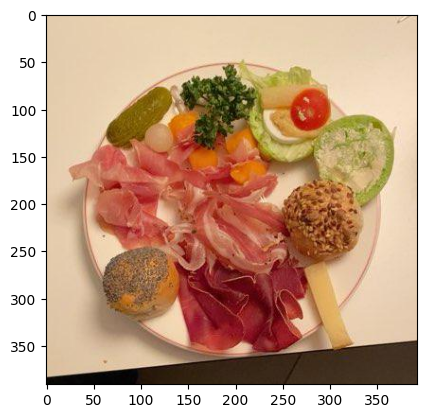

In [58]:
'''
Image with 13 labels in train dataset
'''
# pathTrain = 'data/food/train/'
# pathVal = 'data/food/val/'
source = pathTrain + 'images/074414.jpg'
# Load an image from a file path
im = Image.open(source)

# Display the image
plt.imshow(im)
plt.show()

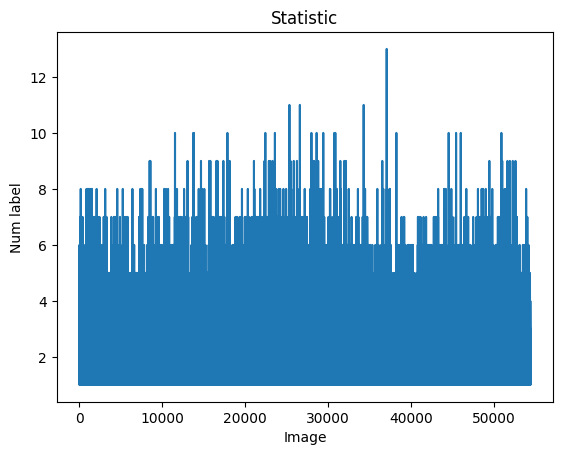

In [31]:
# Define the data
x = np.arange(0, len(train_label))
# Plot the data
plt.plot(x, train_label.sum(axis=1))
# Add labels and title
plt.xlabel('Image')
plt.ylabel('Num label')
plt.title('Statistic')
# Display the chart
plt.show()

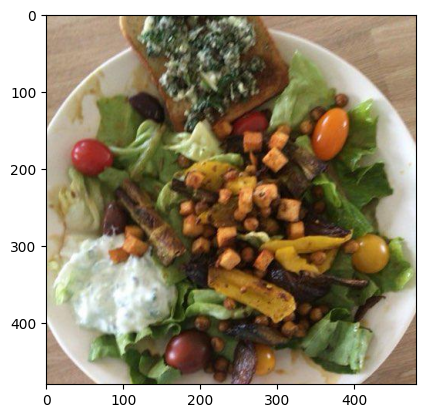

In [74]:
'''
Image with 9 labels in valid dataset
'''
pathVal = 'data/food/val/'
source = pathVal + 'images/167499.jpg'
# Load an image from a file path
im = Image.open(source)

# Display the image
plt.imshow(im)
plt.show()